In [2]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
SAVE_PLOTS = False

save_path = 'plots/out_of_distribution_detection'

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["font.family"] = "serif"

In [4]:
# load data

# in-distribution data
with open(f'../out/bert_teacher/final_e3_lr2_hd020_ad020_cd030/results/results.json', 'r') as f:
    results_teacher = json.load(f)
    
with open('../out/bert_student/m5_k10/shen_2_lr0.0002_e4/results/results.json', 'r') as f:
    results_student = json.load(f)
    
with open('../out/bert_student_augmented/m5_k10/shen_2_lr0.0002_e2_augmented/results/results.json', 'r') as f:
    results_augmented_student = json.load(f)

# out-of-distribution data - hate speech
with open('../out/out_of_distribution_detection/hate/results_bert_teacher.json') as f:
    results_teacher_hs = json.load(f)
    
with open('../out/out_of_distribution_detection/hate/results_bert_student.json') as f:
    results_student_hs = json.load(f)
    
with open('../out/out_of_distribution_detection/hate/results_bert_augmented_student.json') as f:
    results_augmented_student_hs = json.load(f)
    
# out-of-distribution data - offensive language
with open('../out/out_of_distribution_detection/offensive/results_bert_teacher.json') as f:
    results_teacher_ol = json.load(f)
    
with open('../out/out_of_distribution_detection/offensive/results_bert_student.json') as f:
    results_student_ol = json.load(f)
    
with open('../out/out_of_distribution_detection/offensive/results_bert_augmented_student.json') as f:
    results_augmented_student_ol = json.load(f)
    
# out-of-distribution data - irony
with open('../out/out_of_distribution_detection/irony/results_bert_teacher.json') as f:
    results_teacher_ir = json.load(f)

with open('../out/out_of_distribution_detection/irony/results_bert_student.json') as f:
    results_student_ir = json.load(f)
    
with open('../out/out_of_distribution_detection/irony/results_bert_augmented_student.json') as f:
    results_augmented_student_ir = json.load(f)

In [5]:
results_teacher_hs['f1'], results_student_hs['f1'], results_augmented_student_hs['f1']

(0.5438030721274805, 0.5339009934067779, 0.531064784639124)

In [6]:
results_teacher_ol['f1'], results_student_ol['f1'], results_augmented_student_ol['f1']

(0.5317115555395825, 0.4927006432221271, 0.4813910947572165)

In [7]:
results_teacher_ir['f1'], results_student_ir['f1'], results_augmented_student_ir['f1']

(0.1370267243100695, 0.13179722222719742, 0.12058280806082507)

In [12]:
# compare brier score, ece, nll 

# brier score
brier_teacher, brier_student, brier_augmented_student = results_teacher['brier_score'], results_student['brier_score'], results_augmented_student['brier_score']

brier_teacher_hs, brier_student_hs, brier_augmented_student_hs = results_teacher_hs['bs'], results_student_hs['bs'], results_augmented_student_hs['bs']

brier_teacher_ol, brier_student_ol, brier_augmented_student_ol  = results_teacher_ol['bs'], results_student_ol['bs'], results_augmented_student_ol['bs']

brier_teacher_ir, brier_student_ir, brier_augmented_student_ir  = results_teacher_ir['bs'], results_student_ir['bs'], results_augmented_student_ir['bs']

print('Brier score')
print(f'{"":<20}{"Training Data":<20}{"Hate Speech":<20}{"Offensive Language":<20}{"Irony"}')
print(f'{"Teacher":<20}{brier_teacher:<20.3f}{brier_teacher_hs:<20.3f}{brier_teacher_ol:<20.3f}{brier_teacher_ir:<20.3f}')
print(f'{"Student":<20}{brier_student:<20.3f}{brier_student_hs:<20.3f}{brier_student_ol:<20.3f}{brier_student_ir:<20.3f}')
print(f'{"Augmented Student":<20}{brier_augmented_student:<20.3f}{brier_augmented_student_hs:<20.3f}{brier_augmented_student_ol:<20.3f}{brier_augmented_student_ir:<20.3f}')

# ece
ece_teacher, ece_student, ece_augmented_student = results_teacher['ece_score_l1'], results_student['ece_score_l1'], results_augmented_student['ece_score']

ece_teacher_hs, ece_student_hs, ece_augmented_student_hs = results_teacher_hs['ece'], results_student_hs['ece'], results_augmented_student_hs['ece']

ece_teacher_ol, ece_student_ol, ece_augmented_student_ol = results_teacher_ol['ece'], results_student_ol['ece'], results_augmented_student_ol['ece']

ece_teacher_ir, ece_student_ir, ece_augmented_student_ir = results_teacher_ir['ece'], results_student_ir['ece'], results_augmented_student_ir['ece']

print('\nECE')
print(f'{"":<20}{"Training Data":<20}{"Hate Speech":<20}{"Offensive Language":<20}{"Irony"}')
print(f'{"Teacher":<20}{ece_teacher:<20.3f}{ece_teacher_hs:<20.3f}{ece_teacher_ol:<20.3f}{ece_teacher_ir:<20.3f}')
print(f'{"Student":<20}{ece_student:<20.3f}{ece_student_hs:<20.3f}{ece_student_ol:<20.3f}{ece_student_ir:<20.3f}')
print(f'{"Augmented Student":<20}{ece_augmented_student:<20.3f}{ece_augmented_student_hs:<20.3f}{ece_augmented_student_ol:<20.3f}{ece_augmented_student_ir:<20.3f}')

# nll
nll_teacher, nll_student, nll_augmented_student = results_teacher['nll_score'], results_student['nll_score'], results_augmented_student['nll_score']

nll_teacher_hs, nll_student_hs, nll_augmented_student_hs = results_teacher_hs['nll'], results_student_hs['nll'], results_augmented_student_hs['nll']

nll_teacher_ol, nll_student_ol, nll_augmented_student_ol = results_teacher_ol['nll'], results_student_ol['nll'], results_augmented_student_ol['nll']

nll_teacher_ir, nll_student_ir, nll_augmented_student_ir = results_teacher_ir['nll'], results_student_ir['nll'], results_augmented_student_ir['nll']

print('\nNLL')
print(f'{"":<20}{"Training Data":<20}{"Hate Speech":<20}{"Offensive Language":<20}{"Irony"}')
print(f'{"Teacher":<20}{nll_teacher:<20.3f}{nll_teacher_hs:<20.3f}{nll_teacher_ol:<20.3f}{nll_teacher_ir:<20.3f}')
print(f'{"Student":<20}{nll_student:<20.3f}{nll_student_hs:<20.3f}{nll_student_ol:<20.3f}{nll_student_ir:<20.3f}')
print(f'{"Augmented Student":<20}{nll_augmented_student:<20.3f}{nll_augmented_student_hs:<20.3f}{nll_augmented_student_ol:<20.3f}{nll_augmented_student_ir:<20.3f}')


Brier score
                    Training Data       Hate Speech         Offensive Language  Irony
Teacher             0.024               0.299               0.191               0.438               
Student             0.025               0.302               0.200               0.440               
Augmented Student   0.024               0.292               0.199               0.440               

ECE
                    Training Data       Hate Speech         Offensive Language  Irony
Teacher             0.022               0.494               0.585               0.421               
Student             0.022               0.490               0.581               0.424               
Augmented Student   0.345               0.483               0.569               0.417               

NLL
                    Training Data       Hate Speech         Offensive Language  Irony
Teacher             0.087               1.221               0.630               1.585               
Student      

In [13]:
bald_teacher = np.array(results_teacher['bald_score'])
bald_student = np.array(results_student['bald_score'])
bald_augmented_student = np.array(results_augmented_student['bald_score'])

bald_teacher_hs = np.array(results_teacher_hs['bald'])
bald_student_hs = np.array(results_student_hs['bald'])
bald_augmented_student_hs = np.array(results_augmented_student_hs['bald'])

bald_teacher_ol = np.array(results_teacher_ol['bald'])
bald_student_ol = np.array(results_student_ol['bald'])
bald_augmented_student_ol = np.array(results_augmented_student_ol['bald'])

bald_teacher_ir = np.array(results_teacher_ir['bald'])
bald_student_ir = np.array(results_student_ir['bald'])
bald_augmented_student_ir = np.array(results_augmented_student_ir['bald'])

In [14]:
# plot distribution of bald scores
def plot_bald_distribution(bald, bald_hs, bald_ol, bald_ir):
    fig = plt.figure(figsize=(6,5))
    sns.kdeplot(bald, label='ID Data', shade=True, color=sns.color_palette()[3], alpha=0.4)
    sns.kdeplot(bald_hs, label='OOD Data (HS)', shade=True, color=sns.color_palette()[4], alpha=0.6)
    sns.kdeplot(bald_ol, label='OOD Data (OL)', shade=True, color=sns.color_palette()[6], alpha=0.2)
    sns.kdeplot(bald_ir, label='OOD Data (IR)', shade=True, color=sns.color_palette()[7], alpha=0.2)
    plt.xlabel('BALD Score')
    plt.ylabel('Density')
    plt.legend(loc='upper right')

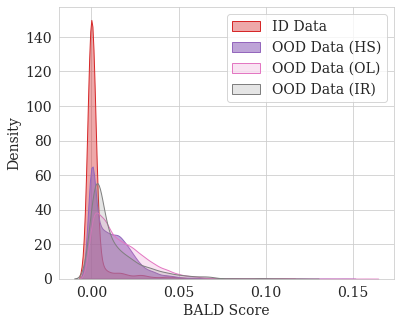

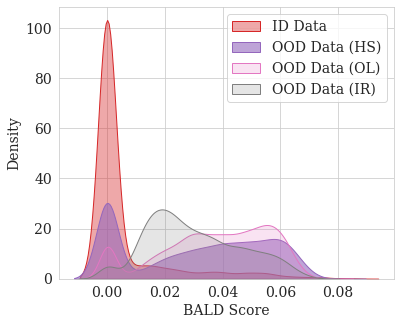

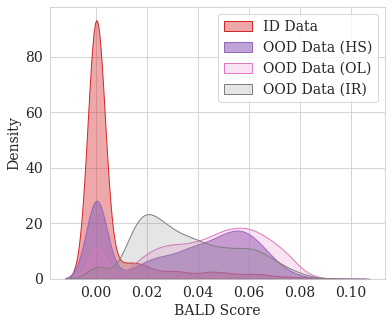

In [15]:
for bald, bald_hs, bald_ol, bald_ir, model in zip([bald_teacher, bald_student, bald_augmented_student], [bald_teacher_hs, bald_student_hs, bald_augmented_student_hs], [bald_teacher_ol, bald_student_ol, bald_augmented_student_ol], [bald_teacher_ir, bald_student_ir, bald_augmented_student_ir], ['teacher', 'student', 'augmented_student']):
    plot_bald_distribution(bald, bald_hs, bald_ol, bald_ir)
    if SAVE_PLOTS:
        plt.tight_layout()
        plt.savefig(os.path.join(save_path, f'plot_bald_distribution_{model}.pdf'))
        plt.close()

In [16]:
colors = [sns.color_palette()[7], sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]]

# compute relative mean bald
relative_mean_bald_teacher_reference = 1.0
relative_mean_bald_student_reference = 1.0
relative_mean_bald_augmented_student_reference = 1.0

relative_mean_bald_teacher_hs = np.mean(bald_teacher_hs) / np.mean(bald_teacher)
relative_mean_bald_student_hs = np.mean(bald_student_hs) / np.mean(bald_student)
relative_mean_bald_augmented_student_hs = np.mean(bald_augmented_student_hs) / np.mean(bald_augmented_student)

relative_mean_bald_teacher_ol = np.mean(bald_teacher_ol) / np.mean(bald_teacher)
relative_mean_bald_student_ol = np.mean(bald_student_ol) / np.mean(bald_student)
relative_mean_bald_augmented_student_ol = np.mean(bald_augmented_student_ol) / np.mean(bald_augmented_student)

relative_mean_bald_teacher_ir = np.mean(bald_teacher_ir) / np.mean(bald_teacher)
relative_mean_bald_student_ir = np.mean(bald_student_ir) / np.mean(bald_student)
relative_mean_bald_augmented_student_ir = np.mean(bald_augmented_student_ir) / np.mean(bald_augmented_student)

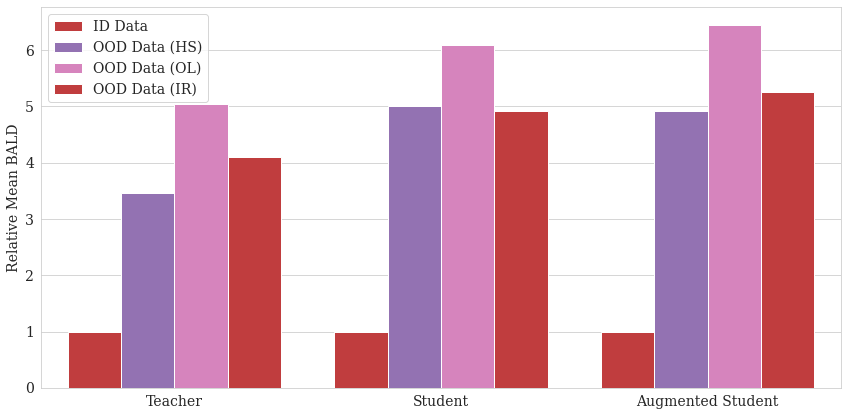

In [17]:
import pandas as pd

plt.figure(figsize=(12, 6))

models = ['Teacher', 'Student', 'Augmented Student']
conditions = ['Reference', 'HS', 'OL', 'IR']
data = {
    'Model': [],
    'Condition': [],
    'Relative Mean BALD': []
}

for model in models:
    for condition in conditions:
        value_name = f'relative_mean_bald_{model.lower().replace(" ", "_")}_{condition.lower()}'
        value = locals()[value_name]
        data['Model'].append(model)
        data['Condition'].append(condition)
        data['Relative Mean BALD'].append(value)

df = pd.DataFrame(data)

bp = sns.barplot(data=df, x='Model', y='Relative Mean BALD', hue='Condition',
            palette=[sns.color_palette()[3], sns.color_palette()[4], sns.color_palette()[6]])

handles, _ = bp.get_legend_handles_labels()
bp.legend(handles=handles, labels=['ID Data', 'OOD Data (HS)', 'OOD Data (OL)', 'OOD Data (IR)'])

plt.xlabel('')
plt.ylabel('Relative Mean BALD')
plt.tight_layout()

if SAVE_PLOTS:
    plt.tight_layout()
    plt.savefig(os.path.join(save_path, 'barplot_relative_mean_bald.pdf'))
    plt.close()

#### Predictive Entropy

predictive entropy histogram on known and OOD inputs 

In [18]:
from scipy.stats import entropy

teacher_entropy = [entropy([p, 1-p])  for p in results_teacher['y_prob']]
student_entropy = [entropy([p, 1-p])  for p in results_student['y_prob']]
augmented_student_entropy = [entropy([p, 1-p])  for p in results_augmented_student['y_prob']]

# hs
teacher_entropy_hs = [entropy([p, 1-p])  for p in results_teacher_hs['y_prob_mcd']]
student_entropy_hs = [entropy([p, 1-p])  for p in results_student_hs['y_prob_mcd']]
augmented_student_entropy_hs = [entropy([p, 1-p])  for p in results_augmented_student_hs['y_prob_mcd']]

# ol
teacher_entropy_ol = [entropy([p, 1-p])  for p in results_teacher_ol['y_prob_mcd']]
student_entropy_ol = [entropy([p, 1-p])  for p in results_student_ol['y_prob_mcd']]
augmented_student_entropy_ol = [entropy([p, 1-p])  for p in results_augmented_student_ol['y_prob_mcd']]

# irony
teacher_entropy_ir = [entropy([p, 1-p])  for p in results_teacher_ir['y_prob_mcd']]
student_entropy_ir = [entropy([p, 1-p])  for p in results_student_ir['y_prob_mcd']]
augmented_student_entropy_ir = [entropy([p, 1-p])  for p in results_augmented_student_ir['y_prob_mcd']]

In [19]:
# plot distribution of predictive entropy per dataset across models
# for a dataset, plot the predictive entropy of the models
def plot_predictive_entropy(teacher_entropy, student_entropy, augmented_student_entropy):
    fig = plt.figure(figsize=(6,5))
    sns.kdeplot(teacher_entropy, label='Teacher', shade=False, color=sns.color_palette()[3], alpha=1)
    sns.kdeplot(student_entropy, label='Student', shade=False, color=sns.color_palette()[4], alpha=1)
    sns.kdeplot(augmented_student_entropy, label='Augmented Student', shade=False, color=sns.color_palette()[6], alpha=1)
    plt.xlabel('Predictive Entropy')
    plt.ylabel('Density')
    plt.ylim(0,3)
    plt.legend()
    # TODO: add mean entropy to legend?

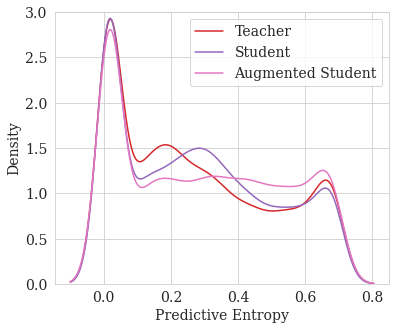

In [20]:
# for hs
plot_predictive_entropy(teacher_entropy_hs, student_entropy_hs, augmented_student_entropy_hs)

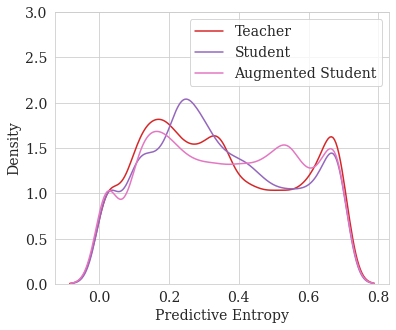

In [21]:
# for ol
plot_predictive_entropy(teacher_entropy_ol, student_entropy_ol, augmented_student_entropy_ol)

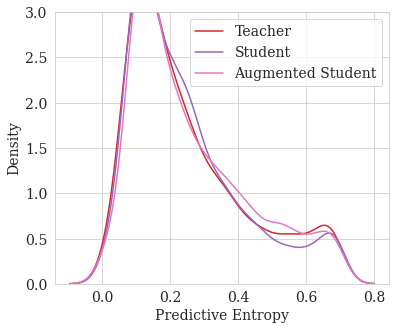

In [22]:
# for irony
plot_predictive_entropy(teacher_entropy_ir, student_entropy_ir, augmented_student_entropy_ir)

In [ ]:
# note: histograms are a bit pointless here, tried it and it didn't look great